In [1]:
#//import dependencies
import pandas as pd 
from sqlalchemy import create_engine

In [4]:
#create_engine to connect to database
engine = create_engine('postgresql://localhost:5432/HP')
connection = engine.connect()

In [9]:
#//Read Employees Data From SQL table

df = pd.read_sql_table("employees",engine)
df

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08


In [48]:
#Build a query to join salaries and employees, 

query='''
select employees.emp_no,employees.last_name,employees.first_name,employees.sex,employees.emp_title_id,(salaries.salary) 
	from employees 
	inner join salaries 
	on salaries.emp_no = employees.emp_no
    '''
# execute the query and read it into a dataframe
df = pd.read_sql_query(query,engine)
df

,emp_no,last_name,first_name,sex,emp_title_id,salary
0,10005,Maliniak,Kyoichi,M,s0001,78228
1,10010,Piveteau,Duangkaew,F,e0002,72488
2,10011,Sluis,Mary,F,s0001,42365
3,10013,Terkki,Eberhardt,M,s0002,40000
4,10017,Bouloucos,Cristinel,F,s0001,71380
...,...,...,...,...,...,...
300019,499948,Paludetto,Cordelia,M,e0002,40000
300020,499972,Leuchs,Katsuo,F,e0003,41002
300021,499985,Lukaszewicz,Gila,M,s0001,40000
300022,499987,Dusink,Rimli,F,s0001,52282


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1c19f9890>]],
      dtype=object)

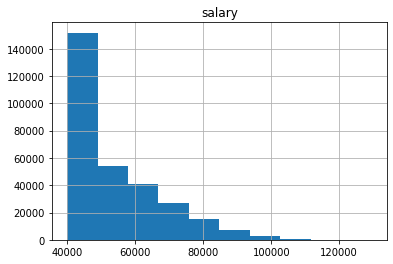

In [18]:
#Plot Histogram of Salary
df.hist(column='salary')

In [29]:

#Group the dataframe by title_id
df.groupby('emp_title_id')

In [49]:

#Group the data by employee title id
df_grouped = df.groupby('emp_title_id')

In [50]:
#Find the average salary by title

df_mean = df_grouped['salary'].mean()

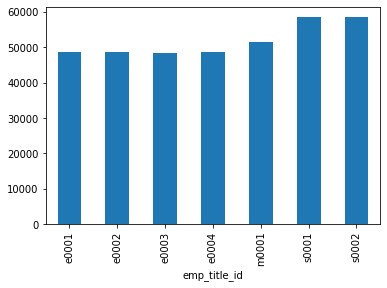

In [52]:
#Plot the mean salary by title

df_mean.plot.bar()

In [53]:
#Locate employee with employee number 499942
df.loc[ df["emp_no"]== 499942]

,emp_no,last_name,first_name,sex,emp_title_id,salary
37455,499942,Foolsday,April,F,e0004,40000
